<a href="https://colab.research.google.com/github/aakarshbalpande/Telecom-Churn-Prediction-project/blob/main/Telecom_Churn_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path to dataset files: /kaggle/input/telco-customer-churn


<ipython-input-12-4e25e3d8ecdb>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


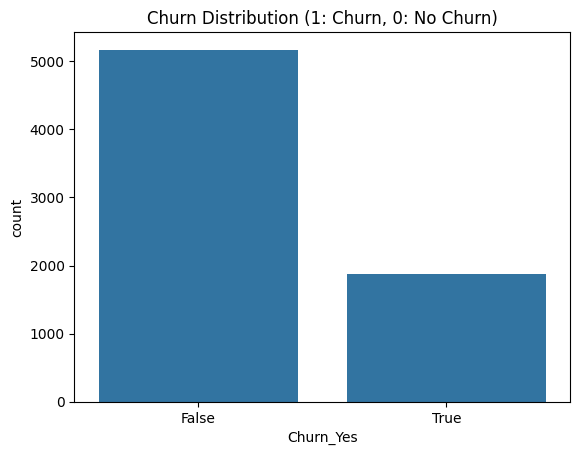

              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1036
        True       0.70      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.71      1409
weighted avg       0.79      0.80      0.78      1409



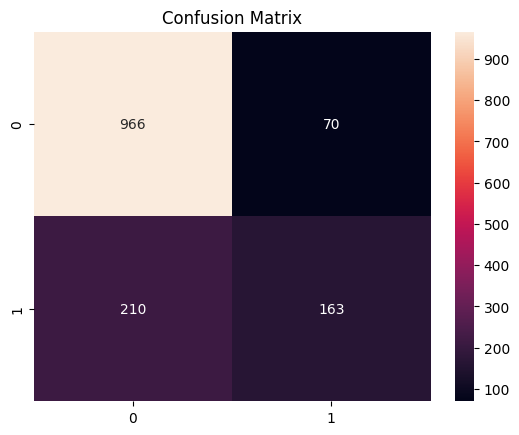

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)
data_file_path = os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
data = pd.read_csv(data_file_path)
data.fillna(method='ffill', inplace=True)
data = pd.get_dummies(data, drop_first=True)

if 'Churn_Yes' in data.columns:
    sns.countplot(x='Churn_Yes', data=data) # Use the new column name 'Churn_Yes'
    plt.title('Churn Distribution (1: Churn, 0: No Churn)')
    plt.show()
else:
    print("Error: 'Churn_Yes' column not found after get_dummies. Please inspect data.columns.")

X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()